# `1 - Load data`

In [3819]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import sklearn
import sklearn.linear_model
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'matplotlib'
plt.rcParams.update({'font.size': 8})

df = pd.read_csv('..//data//Dataset-vf.csv')
df['Y'] = pd.factorize(df['Y'])[0]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.drop('Y', axis=1), df['Y'], test_size=0.2, random_state=777, stratify=df['Y'])
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

# `2 - Deep analysis into the data`

### Scale is very different, might need to normalize later

In [3820]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,5099.000000,4605.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.00000,5099.000000,5099.000000,5099.000000,5099.000000
mean,2637.793097,152.344408,17.048245,192.856442,48.000392,1512.099235,215.472249,218.08433,130.003922,1430.700922,0.494062,9.176701
std,393.232565,105.159613,9.038995,177.388281,57.081865,1276.371352,31.443763,23.90876,49.211635,1106.175894,0.291092,575.217284
min,1874.000000,0.000000,1.000000,0.000000,-134.000000,30.000000,0.000000,99.00000,0.000000,30.000000,0.000000,-1000.000000
25%,2287.000000,69.000000,10.000000,42.000000,2.000000,624.000000,201.000000,206.00000,97.000000,663.000000,0.250000,-486.000000
50%,2686.000000,122.000000,16.000000,150.000000,29.000000,1150.000000,223.000000,222.00000,135.000000,1181.000000,0.490000,25.000000
75%,2918.500000,238.000000,24.000000,295.000000,78.000000,1959.000000,239.000000,235.00000,164.000000,1861.000000,0.750000,495.500000
max,3675.000000,360.000000,52.000000,1129.000000,334.000000,6890.000000,254.000000,254.00000,248.000000,6853.000000,1.000000,1000.000000


### There are 7 classes, and classes are imbalancd

In [3821]:
y_train.value_counts()


1    1296
0    1257
3    1020
4    1000
6     246
5     200
2      80
Name: Y, dtype: int64

### Null entries
* `X2` = `627` null entries
* `X15` = `5743` null entries


In [3822]:
X_train.isnull().sum()

X1        0
X2      494
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15    4591
dtype: int64

- `90% `of column `X15` is missing, we might have to drop it since we can imputate 90% of the data with th information of 10%.
<br> However let's conduct some final analysis before dropping it just in case it has high correlation with the label.


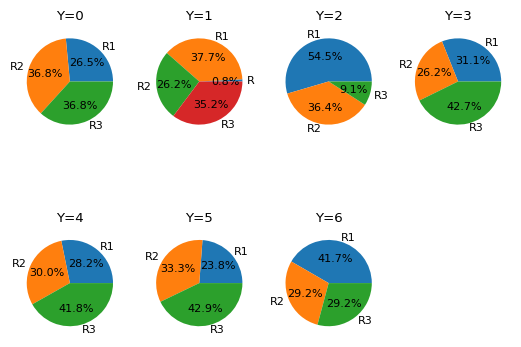

In [3823]:
figure , ax = plt.subplots(2,4)
for c in np.unique(data_train['Y']):
   i,j = int(c/4), c%4
   p = data_train.query(f"Y=={c}").groupby('X15')['X15'].count()
   ax[i,j].pie(p, labels=p.index, autopct='%1.1f%%')
   ax[i,j].set_title(f"Y={c}")
ax[-1,-1].set_visible(False)
plt.show()



#### `Result`: as can be observed, the classes are not disciminative, hence, we drop it.


In [3824]:
X_train.drop(columns=['X15'],inplace=True)
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
317,3112,NaN,8,95,5,5346,202,228,165,664,0.82,-599,FC11,CA49
6082,2979,59.0,15,67,12,624,230,207,106,499,0.55,691,FC11,CA49
992,2807,150.0,22,285,-15,660,242,233,109,485,0.79,101,FC11,CA50
40,2193,38.0,24,0,0,1338,211,179,91,939,0.12,-386,FC14,CA37
1803,2821,297.0,4,85,1,992,208,238,169,242,0.35,895,FC13,CA43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,2679,NaN,14,67,4,1530,208,211,138,1339,0.55,44,FC13,CA30
604,3226,121.0,19,242,64,1549,249,221,92,2751,0.60,256,FC11,CA49
4526,2352,108.0,35,255,127,492,253,176,18,1806,0.71,-12,FC14,CA23
2649,2420,57.0,23,201,-11,805,228,184,76,765,0.47,573,FC14,CA30


# `3 -  Encoding categorical data`
`X13` and `X14` are categorical, so we will have to enocide them. <br>
However, before doing so, let is analyse how more dimenstions that will results in

In [3825]:
ex_d1 = np.unique(X_train['X13'].values)
ex_d2 = np.unique(X_train['X14'].values) 
print("X13 will add", len(ex_d1) -1, "new columns")
print("X14 will add", len(ex_d2) -1, "new columns")
print("both wil add", len(ex_d1) + len(ex_d2) -2, "new columns")


X13 will add 3 new columns
X14 will add 31 new columns
both wil add 34 new columns


Encoding both will result in 34 columns, `X13` seems ok as it is only adding 3 new columns. <br>
But we will have to evaluate `X14` to see if it is worth encoding.

## Check the correlation between `X14's` classes and the labels


In [3826]:
# df.query(f"X14 == CA21")
X_train['X14'].values

array([' CA49', ' CA49', ' CA50', ..., ' CA23', ' CA30', ' CA50'],
      dtype=object)

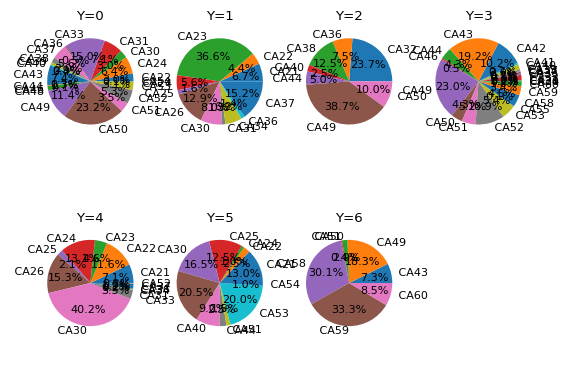

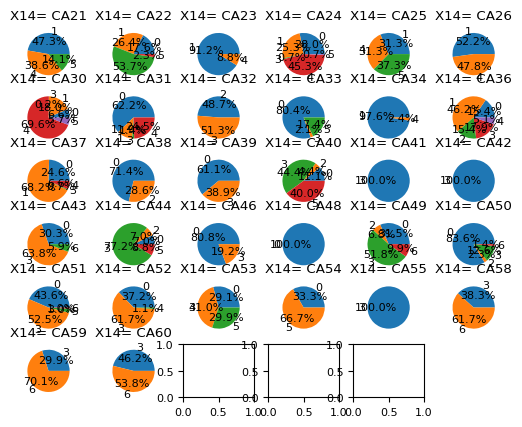

In [3827]:
# Pie with respect to Y
figure , ax = plt.subplots(2,4)
for c in np.unique(data_train['Y']):
   i,j = int(c/4), c%4
   p = data_train.query(f"Y=={c}").groupby('X14')['X14'].count()
   ax[i,j].pie(p, labels=p.index, autopct='%1.1f%%')
   ax[i,j].set_title(f"Y={c}")
ax[-1,-1].axis('off')
plt.show()

# Pie with respect to X14
x14 = np.unique(data_train['X14'])
figure , ax = plt.subplots(6,6)
for c in range(len(x14)):
   i,j = int(c/6), c%6
   p = data_train[data_train['X14'] == x14[c]].groupby('Y')['Y'].count()
   ax[i,j].pie(p, labels=p.index, autopct='%1.1f%%')
   ax[i,j].set_title(f"X14={x14[c]}")
ax[-1,-1].axis('off')
plt.show()


#### `Conclusion`: It is difficult to take decision as this is complicated, hence, I will encode everything

In [3828]:
X_train = pd.get_dummies(X_train)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_ CA49,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60
317,3112,NaN,8,95,5,5346,202,228,165,664,...,1,0,0,0,0,0,0,0,0,0
6082,2979,59.0,15,67,12,624,230,207,106,499,...,1,0,0,0,0,0,0,0,0,0
992,2807,150.0,22,285,-15,660,242,233,109,485,...,0,1,0,0,0,0,0,0,0,0
40,2193,38.0,24,0,0,1338,211,179,91,939,...,0,0,0,0,0,0,0,0,0,0
1803,2821,297.0,4,85,1,992,208,238,169,242,...,0,0,0,0,0,0,0,0,0,0


The following technique are machine learning techniques, so solving data imbalance at this stage is reccmoended.

# 4 - `Imputation`

Column `X2` has 627 empty entry which is manageble.
<br>
To imputate the null values I will use the `KNNImputer` from Sklearn, however, there are some consideration.

1. what is the best value of K that could minimize the error.
<br> `Answer`: I will `remove` `random` values, impute them using `K`, `compare` them with the original, and finally select the K that minimizes the `mse`.
<br>
<br>
2. Do I imputate using only entries from the same class or every entry?
<br> `Answer`: The sample should be close the samples of the same label, hence, I will only use samples of the same label.



In [3829]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [3830]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

def remove_random_values(df, percentage):
    df_copy = df.copy()
    columns = np.random.choice(df_copy.columns, size=int(len(df_copy.columns) * percentage), replace=False)

    for column in columns:
        mask = np.random.choice([True, False], size=len(df_copy), replace=True)
        df_copy.loc[mask, column] = np.nan

    return df_copy

def select_best_imputation_k(df):
    lowest_error, best_K,  best_imputer = float('inf'), None, None
    df_n = df.dropna()
    for K in range(1, 10):

        df_missing_values = remove_random_values(df_n, 0.1)
        imputer = KNNImputer(n_neighbors=K, weights='distance')
        imputer.fit(df_missing_values)
        df_imputed = imputer.transform(df_missing_values)
        error = mean_squared_error(df_n, df_imputed)
        if error < lowest_error:
            lowest_error, best_K = error, K
            best_imputer = imputer
            best_K = K
        

    return best_K, lowest_error, best_imputer



best_k, error, imputer = select_best_imputation_k(X_train)
print(f"Best K: {best_k}, Error: {error}")

Best K: 2, Error: 0.005251856752674338


### Impute the data

In [3831]:
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

# `5 - Dealing with data imbalance`

In [3832]:
from imblearn.over_sampling import SMOTE
columns  = X_train.columns
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train,columns=columns)
y_train = pd.DataFrame(y_train)

# `6 - Deeper look into the data structure using UMAP`

In [3833]:
from sklearn.cluster import KMeans
import umap
import plotly.express as px

reducer = umap.UMAP(n_neighbors=15, min_dist=0.05, n_components=2, random_state=42)
reduced_data = reducer.fit_transform(X_train)
X_train_reduced = pd.DataFrame(reduced_data, columns=['x', 'y'])
X_train_reduced['label'] = y_train.astype(str)
px.scatter(X_train_reduced, x='x', y='y',color='label' ,width=800, height=600)


### Understanding correlation
It is reccommended to remove highly correlated features to limit the redundenacy and allow the model to better generalize the data. However, my experience with remove features following this method has not been very sucessful. Hence, I will resort to other methods for feature selection.

<AxesSubplot: >

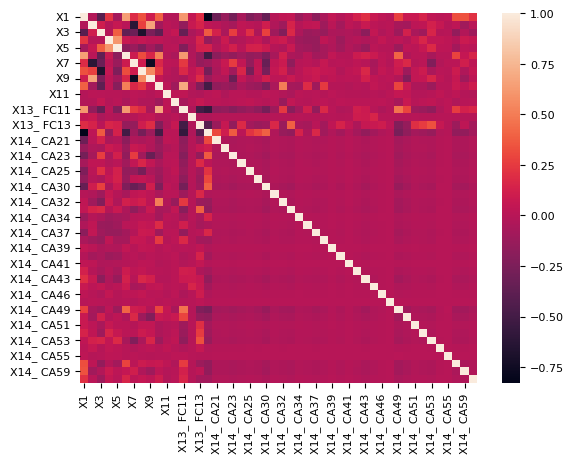

In [3834]:
sns.heatmap(X_train.corr())

# `7 - Feature extraction using Mututal Information`

### I will extract the best K features that provide best performance, the lower K is the better to enhance generalization. that model i will use for determining K will be an `xgboost classifier`

#### I will use bisection to reach the best K value that maximizes the performance on a validation set. Iterating over over 48 features takes a very long time, hence I will assume that K values close to each other hold similar effect. This will enable me to use bisetion safely.

#### `Feature tranformation using LDA, Polynomial, PCA were tested but result were not great.`

In [3835]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

def find_optimal_k(X, y):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    lower_bound = 1
    upper_bound = X_train.shape[1]
    threshold = 1
    best_score = -float('inf')
    optimal_k = -1
    score_list = {}
    while upper_bound - lower_bound > threshold:
        k = (lower_bound + upper_bound) // 2

        selector = SelectKBest(mutual_info_classif, k=k)
        selector.fit(X_train, y_train.to_numpy().ravel())
        columns_to_keep = X_train.columns[selector.get_support()]
        X_train_k = X_train[columns_to_keep]
        X_val_k = X_val[columns_to_keep]

        model = XGBClassifier()
        model.fit(X_train_k, y_train.to_numpy().ravel())
        score = model.score(X_val_k, y_val.to_numpy().ravel())

        score_list[k] = score

        if score > best_score:
            best_score = score
            optimal_k = k
        if score < best_score:
            if k < optimal_k:
                lower_bound = k
            else:
                upper_bound = k

    return score_list


Best K: 22, Score: 0.962534435261708


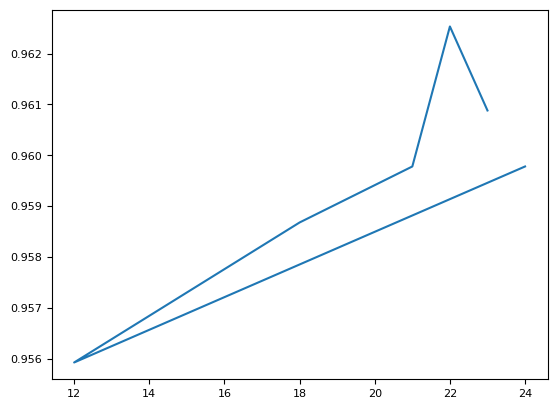

In [3836]:
scores_list = find_optimal_k(X_train, y_train)
keys = list(scores_list.keys())
values = list(scores_list.values())
plt.plot(keys, values)
best_k = max(scores_list, key=scores_list.get)
print(f"Best K: {best_k}, Score: {scores_list[best_k]}")


In [3837]:
selector = SelectKBest(mutual_info_classif, k=best_k)
selector.fit(X_train, y_train.to_numpy().ravel())
columns_to_keep = X_train.columns[selector.get_support()]
X_train = X_train[columns_to_keep]

Let is check if our feature selection method reflected well on the correlation matrix

<AxesSubplot: >

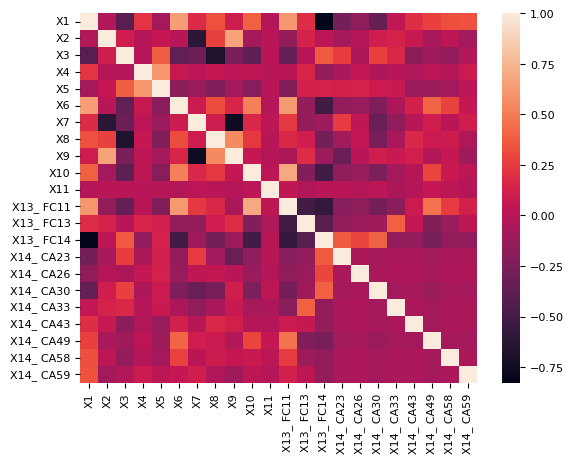

In [3838]:
sns.heatmap(X_train.corr())

# `8 - Setting up the test set`

### dealing with missing columns in the test data.
This is resulted from some column categorical classes are highly not making it to the test data.<br>
In order to impute the test data using the training imputer, we should make the columns identical.<br>
Hence:
* `in case of a missing column:` add the column and fill them with `0` so it does not affect the euclidean distance.
* `in case of an extra column: `remove it.

In [3839]:
X_test.drop(columns = 'X15', inplace=True)
X_test = pd.get_dummies(X_test)

#-------
test_columns = list(X_test.columns)
missing_columns = set(imputer.feature_names_in_) - set(test_columns)
extra_columns =  set(test_columns) - set(imputer.feature_names_in_)
#-------
for col in missing_columns:
    X_test[col] = np.zeros(len(X_test))
    
X_test = X_test.drop(columns=extra_columns)
X_test = X_test[imputer.feature_names_in_]

In [3840]:
X_test_imputed = imputer.transform(X_test)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test = X_test[columns_to_keep]

# `9 - Save the data`

In [3841]:
# train_data = X_train.copy()
# train_data['y'] = y_train.to_numpy().ravel()
# train_data.to_csv('../data/train_data.csv', index=False)

# test_data = X_test.copy()
# test_data['y'] = y_test.to_numpy().ravel()
# test_data.to_csv('../data/test_data.csv', index=False)